This chapter is about loading data. We used make_regression, classification, and blob to simulate data features and targets. Also connected to MySQL and read JSON.

In [52]:
from sklearn import datasets
from sklearn.datasets import make_regression
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import pandas as pd
from sqlalchemy import create_engine

In [23]:
digits = datasets.load_digits()

features = digits.data

target = digits.target

features[0]

#sklearn.utils.Bunch
#type(digits)

#numpy.ndarray
#type(features)

#numpy.ndarray
#type(target)

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [24]:
# When we want a dataset designed to be used with linear regression, make_regression

# Generate features matrix, target vector, and the true coefficients
features_lr, target_lr, coeffficients_lr = make_regression(n_samples=100, n_features=5, n_informative=3, n_targets=1, 
                                                           noise=0.0, coef=True, random_state=1)

print("Feature matrix = ", features_lr[:5])
print("Target Vector = ", target_lr[:5])

Feature matrix =  [[ 0.19829972 -0.20075807  0.18656139 -0.22232814  0.41005165]
 [-1.09491185  1.2245077   0.40349164 -0.44712856  0.59357852]
 [-1.89636092  0.98633519  0.2135339  -0.17470316  2.19069973]
 [-0.11044703  0.31354772  0.50318481 -1.27255876  1.29322588]
 [ 1.09899633  1.1181334   0.6743961  -0.53223402 -0.72239191]]
Target Vector =  [ 3.35625132 20.59244372 14.7538029   1.6742393  31.78477939]


In [29]:
feature_cl, target_cl = make_classification(n_samples=100, n_features=5, n_informative=5, n_redundant=0, 
                                            n_classes= 2, weights=[.25,.75], random_state=1)

feature_cl[:5]
target_cl[:5]


array([1, 1, 0, 1, 1])

In [41]:
# Generate feature matrix and target vector
features_bl, target_bl = make_blobs(n_samples = 100,
                              n_features = 2,
                              centers = 3,
                              cluster_std = 0.5,
                              shuffle = True,
                              random_state = 1)

# View feature matrix and target vector
print('Feature Matrix\n', features_bl[:3])
print('Target Vector\n', target_bl[:3])

Feature Matrix
 [[ -1.22685609   3.25572052]
 [ -9.57463218  -4.38310652]
 [-10.71976941  -4.20558148]]
Target Vector
 [0 1 1]


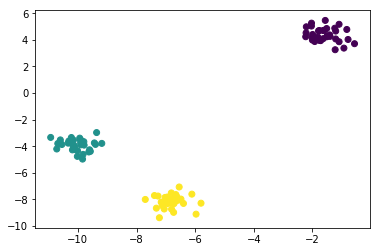

In [47]:
# View scatterplot
plt.scatter(features_bl[:,0], features_bl[:,1], c=target_bl)
plt.show()

In [20]:
# Create URL
url = 'file:///Users/erikjakubowski/Desktop/simulated_json'

# Load data
dataframe = pd.read_json(url, orient='columns')

# View the first two rows
dataframe.head(2)

,index,Departure Delay Mean,Departure Delay Mode,Departure Delay Median,Arrival Delay Mean,Arrival Delay Median,Arrival Delay Mode
0,DL,6,-3,-2,-4,-12,-15
1,NK,9,-7,-4,4,-8,-15


In [55]:
# Create a connection to the database
database_connection = create_engine('mysql+pymysql://localhost:3306/csv_db?user=root')

# Load data
dataframe = pd.read_sql_query('SELECT * FROM wordassociation_ac', database_connection)

# View first two rows
dataframe.head(2)

,author,word1,word2,source,id
0,289,maudie,atticus,AC,1
1,312,limpet,mine,AC,2
